In [190]:
import pandas
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
filenames = [
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-base\\baseCase.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-10pct\\deurbanisation-10pct-matches.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-20pct\\deurbanisation-20pct-matches.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-30pct\\deurbanisation-30pct-matches.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-40pct\\deurbanisation-40pct-matches.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-50pct\\deurbanisation-50pct-matches.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-60pct\\deurbanisation-60pct-matches.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-70pct\\deurbanisation-70pct-matches.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-80pct\\deurbanisation-80pct-matches.output_trips.csv.gz",
             "C:\\Users\\Janekdererste\\Desktop\\deurb\\output-90pct\\deurbanisation-90pct-matches.output_trips.csv.gz"]

names = [ "base case", "10pct", "20pct", "30pct", "40pct", "50pct", "60pct", "70pct", "80pct", "90pct"]

frames = []

for filename, name in zip(filenames, names):
    csv = pandas.read_csv(filename, delimiter=';', compression='gzip')
    csv['runId'] = name
    #print(csv)
    frames.append(csv)
    
df = pandas.concat(frames, ignore_index=True)
#df

In [192]:
#number of trips per run

count = df['runId'].value_counts()
count

base case    169297
10pct        169204
20pct        169075
30pct        168926
40pct        168704
50pct        168522
60pct        168416
70pct        168073
80pct        167905
90pct        167817
Name: runId, dtype: int64

<AxesSubplot:>

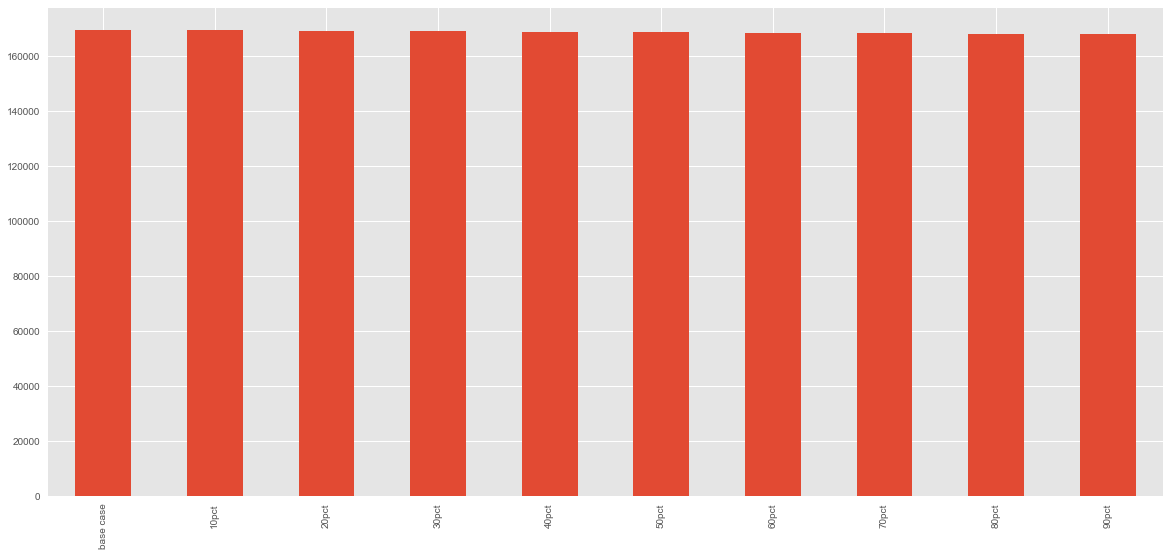

In [193]:
count.plot.bar(figsize=(20,9))

In [194]:
# calculate modal split by run-id
modalSplit = df.groupby(['longest_distance_mode', 'runId']).count()
modalSplit = modalSplit['person'].unstack()
modalSplit

runId,10pct,20pct,30pct,40pct,50pct,60pct,70pct,80pct,90pct,base case
longest_distance_mode,,,,,,,,,,
bike,17928,18358,18712,19212,19995,20581,21050,22304,22666,22617
car,48420,49311,50960,51804,53112,53999,54961,55385,56554,60852
pt,13233,14178,14990,16305,17141,18286,19277,20426,21784,17783
ride,29993,29987,30016,30014,29976,30028,30004,30006,30027,30158
walk,59630,57241,54248,51369,48298,45522,42781,39784,36786,37887


<AxesSubplot:xlabel='longest_distance_mode'>

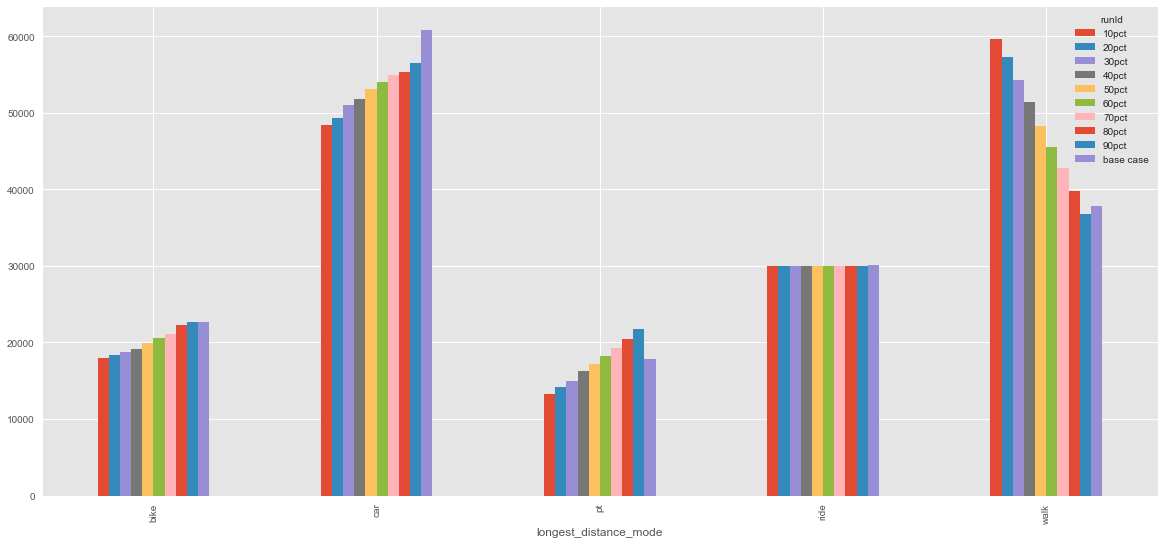

In [195]:
#plot modal split
modalSplit.plot.bar(figsize=(20,9), style='tableau-colorblind10')

In [196]:
# compute modal share (relative modal split)
modalShare = modalSplit / modalSplit.sum()
modalShare

runId,10pct,20pct,30pct,40pct,50pct,60pct,70pct,80pct,90pct,base case
longest_distance_mode,,,,,,,,,,
bike,0.105955,0.108579,0.110770,0.113880,0.118649,0.122203,0.125243,0.132837,0.135064,0.133594
car,0.286163,0.291652,0.301671,0.307070,0.315164,0.320629,0.327007,0.329859,0.336998,0.359439
pt,0.078207,0.083856,0.088737,0.096649,0.101714,0.108576,0.114694,0.121652,0.129808,0.105040
ride,0.177259,0.177359,0.177687,0.177909,0.177876,0.178297,0.178518,0.178708,0.178927,0.178137
walk,0.352415,0.338554,0.321135,0.304492,0.286598,0.270295,0.254538,0.236944,0.219203,0.223790


<AxesSubplot:xlabel='longest_distance_mode'>

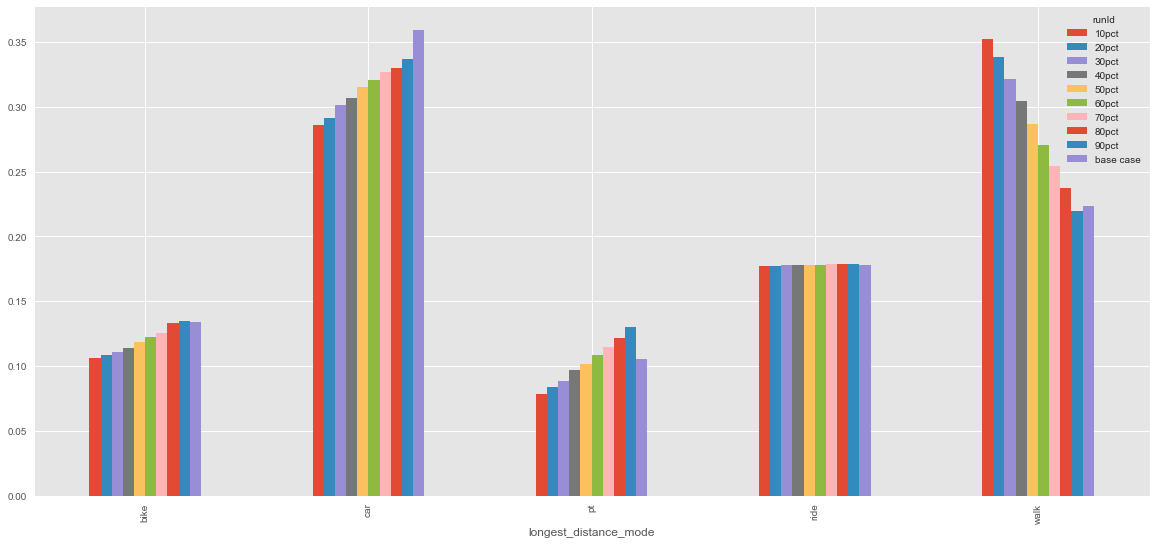

In [197]:
# relative modal split
modalShare.plot.bar(figsize=(20,9))

In [198]:
# cumulated travelled distances

distances = df.groupby(['runId'])['euclidean_distance'].sum()
distances

runId
10pct        1155244180
20pct        1239893427
30pct        1335650917
40pct        1429836286
50pct        1512854659
60pct        1600989161
70pct        1690379940
80pct        1782615409
90pct        1884583473
base case    1345413148
Name: euclidean_distance, dtype: int64

<AxesSubplot:title={'center':'Total Distance Travelled [m]'}, xlabel='runId'>

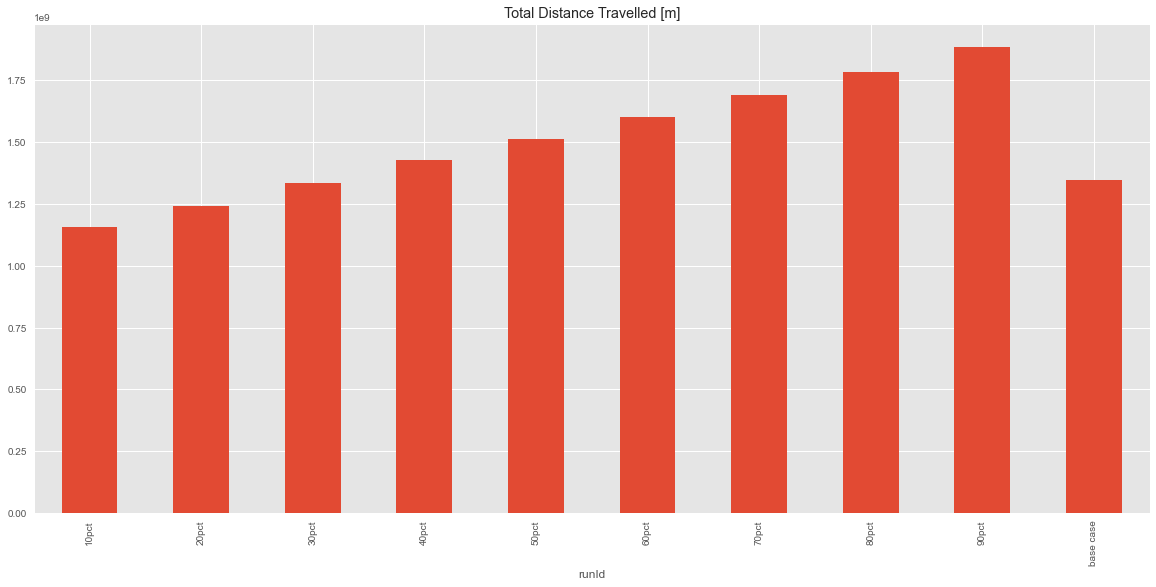

In [199]:
distances.plot.bar(figsize=(20,9), title='Total Distance Travelled [m]')

<AxesSubplot:xlabel='longest_distance_mode'>

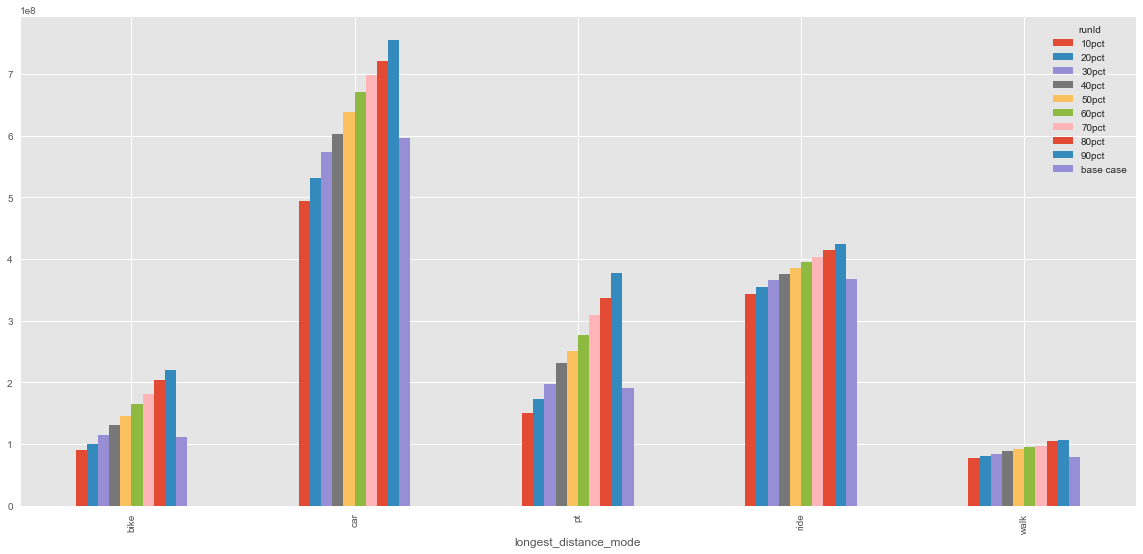

In [211]:
# cumulated distance by mode
sum_distance_by_mode = df.groupby(['longest_distance_mode', 'runId'])['euclidean_distance'].sum()
sum_distance_by_mode.unstack().plot.bar(figsize=(20,9))

In [ ]:
# average distance by trip

avg_distances_per_trip = df.groupby(['runId'])['euclidean_distance'].mean()
avg_distances_per_trip.plot.bar(figsize=(20,9))

<AxesSubplot:xlabel='runId', ylabel='euclidean_distance'>

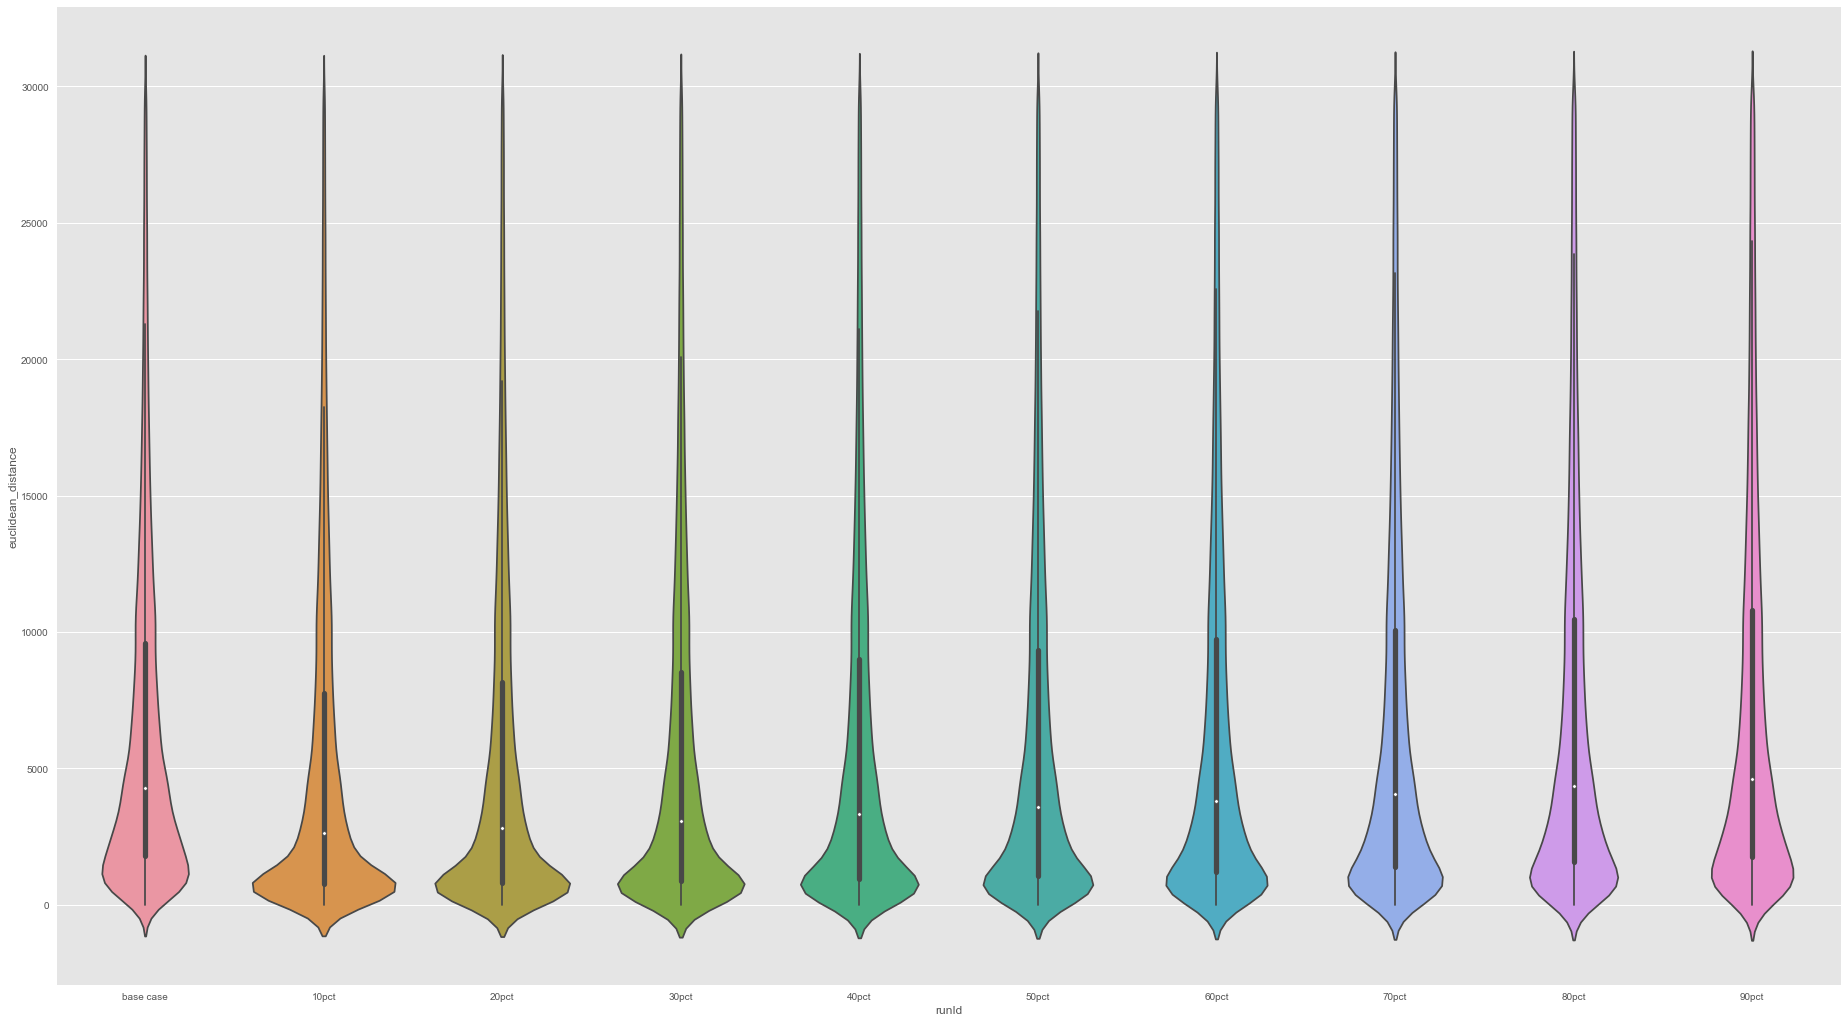

In [201]:
plt.figure(figsize=(32,18))
# average distance by trip violin
f = df.query('euclidean_distance < 30000')
sns.violinplot(data=f, x='runId', y='euclidean_distance')

<AxesSubplot:xlabel='longest_distance_mode'>

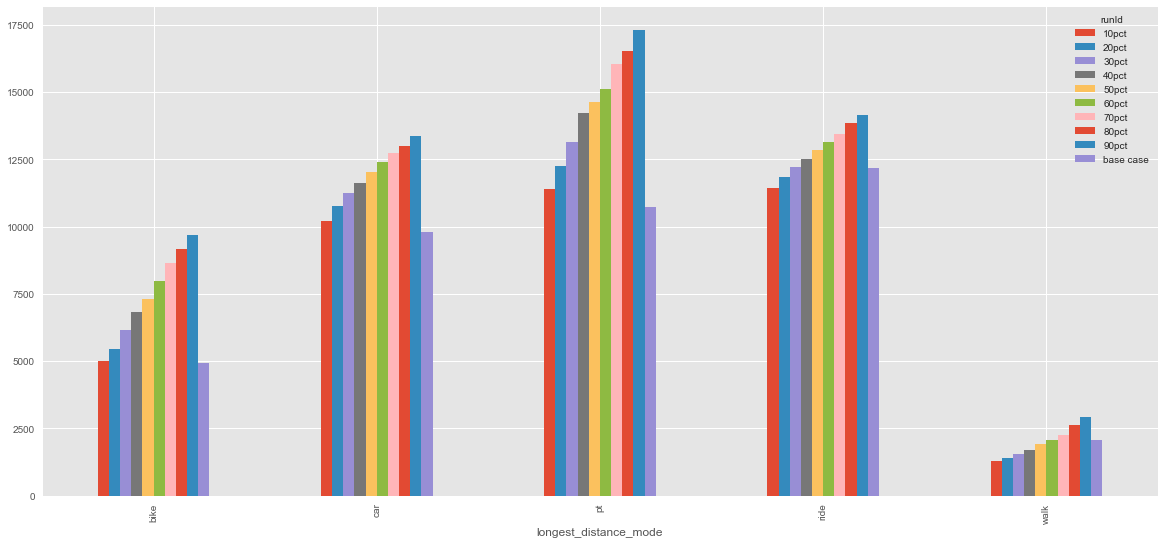

In [202]:
avg_distances_per_trip_and_mode = df.groupby(['longest_distance_mode', 'runId'])['euclidean_distance'].mean()
avg_distances_per_trip_and_mode.unstack().plot.bar(figsize=(20,9))

c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\janekdererste\projects\matsim-analysis-python\venv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  i

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

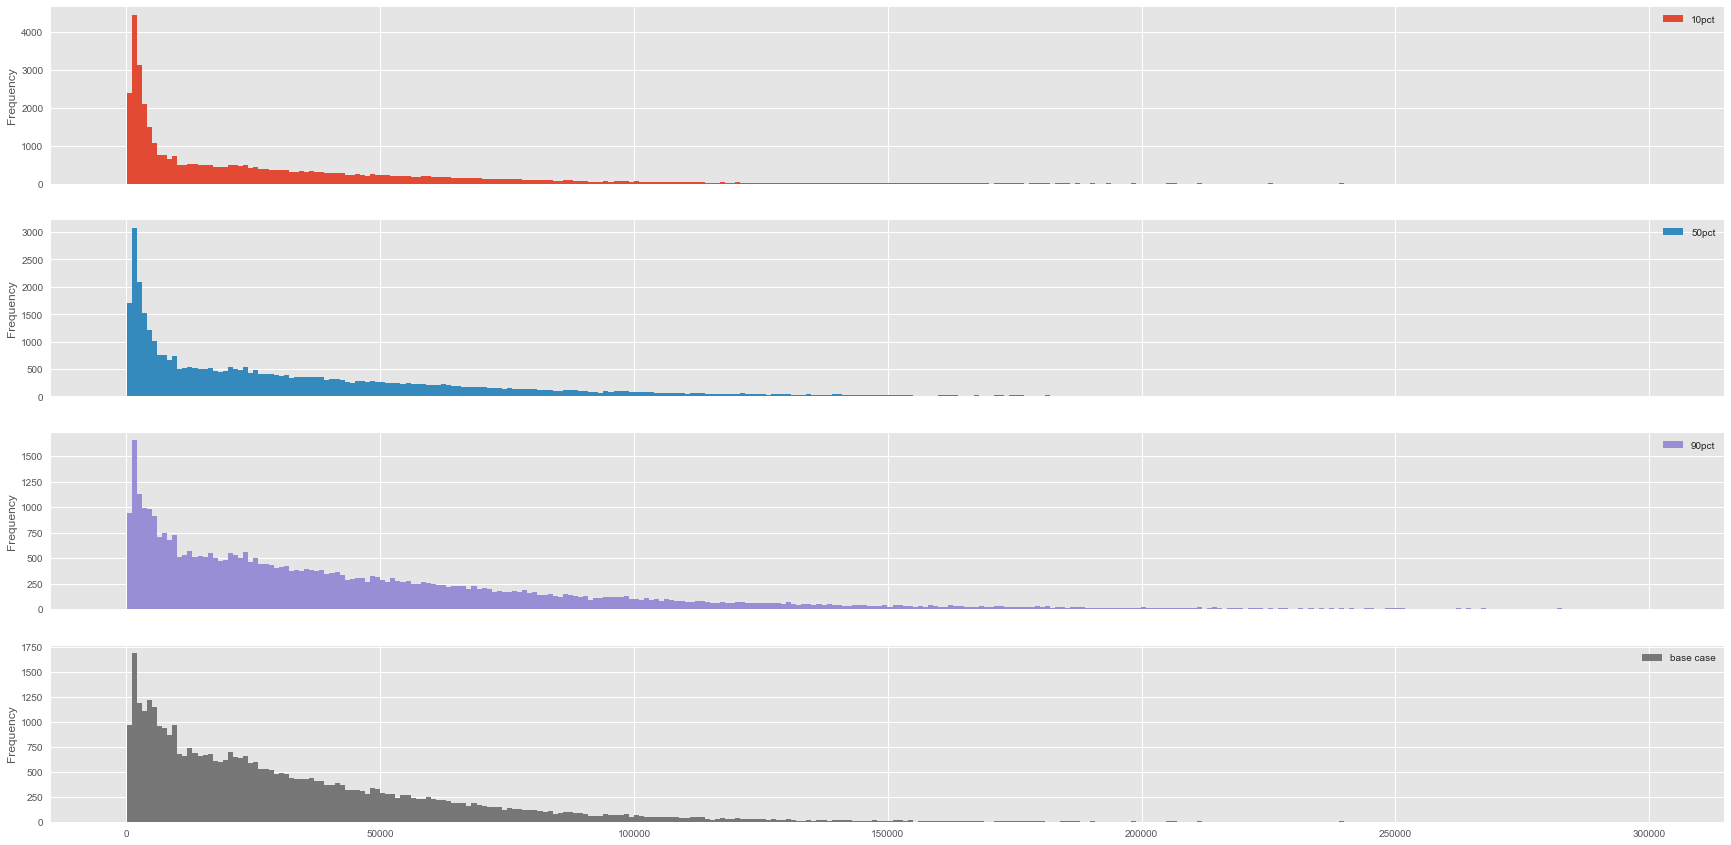

In [203]:
# average distance travelled by agent per day

distances_baseCase = df.query('runId == "base case" or runId == "10pct" or runId == "50pct" or runId == "90pct"')
filtered = distances_baseCase.groupby(['person','runId']).sum().query('euclidean_distance < 300000')['euclidean_distance']

filtered.unstack().plot.hist(figsize=(30,15), bins=300, subplots=True)


In [204]:
#investigate the 50pct run

# load movers data
movers = pandas.read_csv("C:\\Users\\Janekdererste\\Desktop\\deurb\\output-50pct\\trips.movedHome.csv.gz", delimiter=';', compression='gzip')
movers['runId'] = '50pct moved home'
movers_all = pandas.read_csv("C:\\Users\\Janekdererste\\Desktop\\deurb\\output-50pct\\trips.movedAll.csv.gz", delimiter=';', compression='gzip')
movers_all['runId'] = '50pct moved all'
movers = movers.append(movers_all, ignore_index=True)

# filter base case and 50pct overall data from main data frame
all_policy = df.query('runId == "50pct"')
base_case = df.query('runId == "base case"')

# remove duplicated persons in full 50% and movers
all_without_movers = all_policy[~all_policy['person'].isin(movers['person'])]
policy = movers.append(all_without_movers).drop_duplicates('person')

# put the base case back in
policy = policy.append(base_case)

<AxesSubplot:xlabel='longest_distance_mode'>

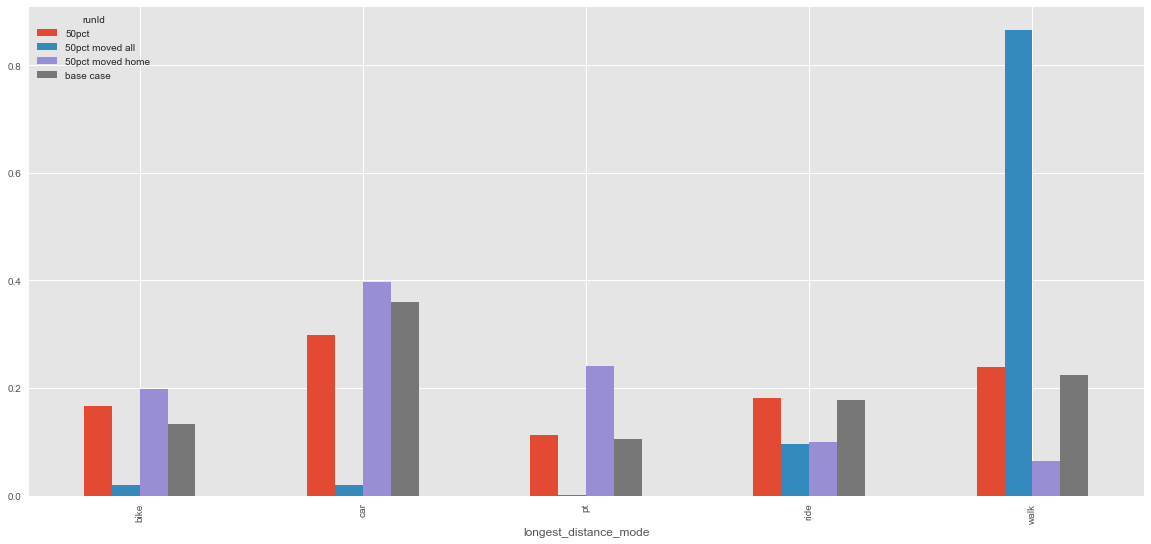

In [205]:
#plot the modal share
policy_modal_split = policy.groupby(['longest_distance_mode', 'runId'])['euclidean_distance'].count().unstack()
policy_modal_split_relative = policy_modal_split / policy_modal_split.sum()
policy_modal_split_relative.plot.bar(figsize=(20,9))

<AxesSubplot:xlabel='longest_distance_mode'>

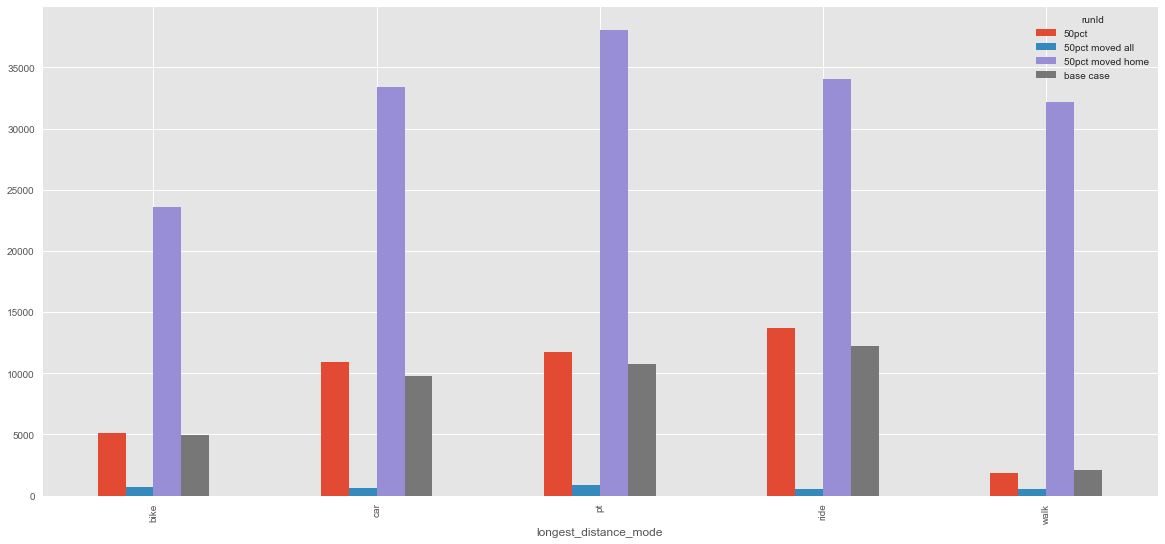

In [206]:
#plot distance per trip by mode
policy_distance_by_mode = policy.groupby(['longest_distance_mode', 'runId'])['euclidean_distance'].mean().unstack()
policy_distance_by_mode.plot.bar(figsize=(20,9))

In [207]:
# plot daily distances travelled
policy.groupby(['runId', 'person'])['euclidean_distance'].mean()


runId      person    
50pct      98601           511.000000
           117201         2149.000000
           309301        21076.000000
           415301         8113.000000
           433501          875.000000
                             ...     
base case  1447637401    32247.500000
           1448844701    32196.000000
           1450914101    27533.666667
           1452379701    53700.000000
           1453895301    39321.857143
Name: euclidean_distance, Length: 80902, dtype: float64

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>],
      dtype=object)

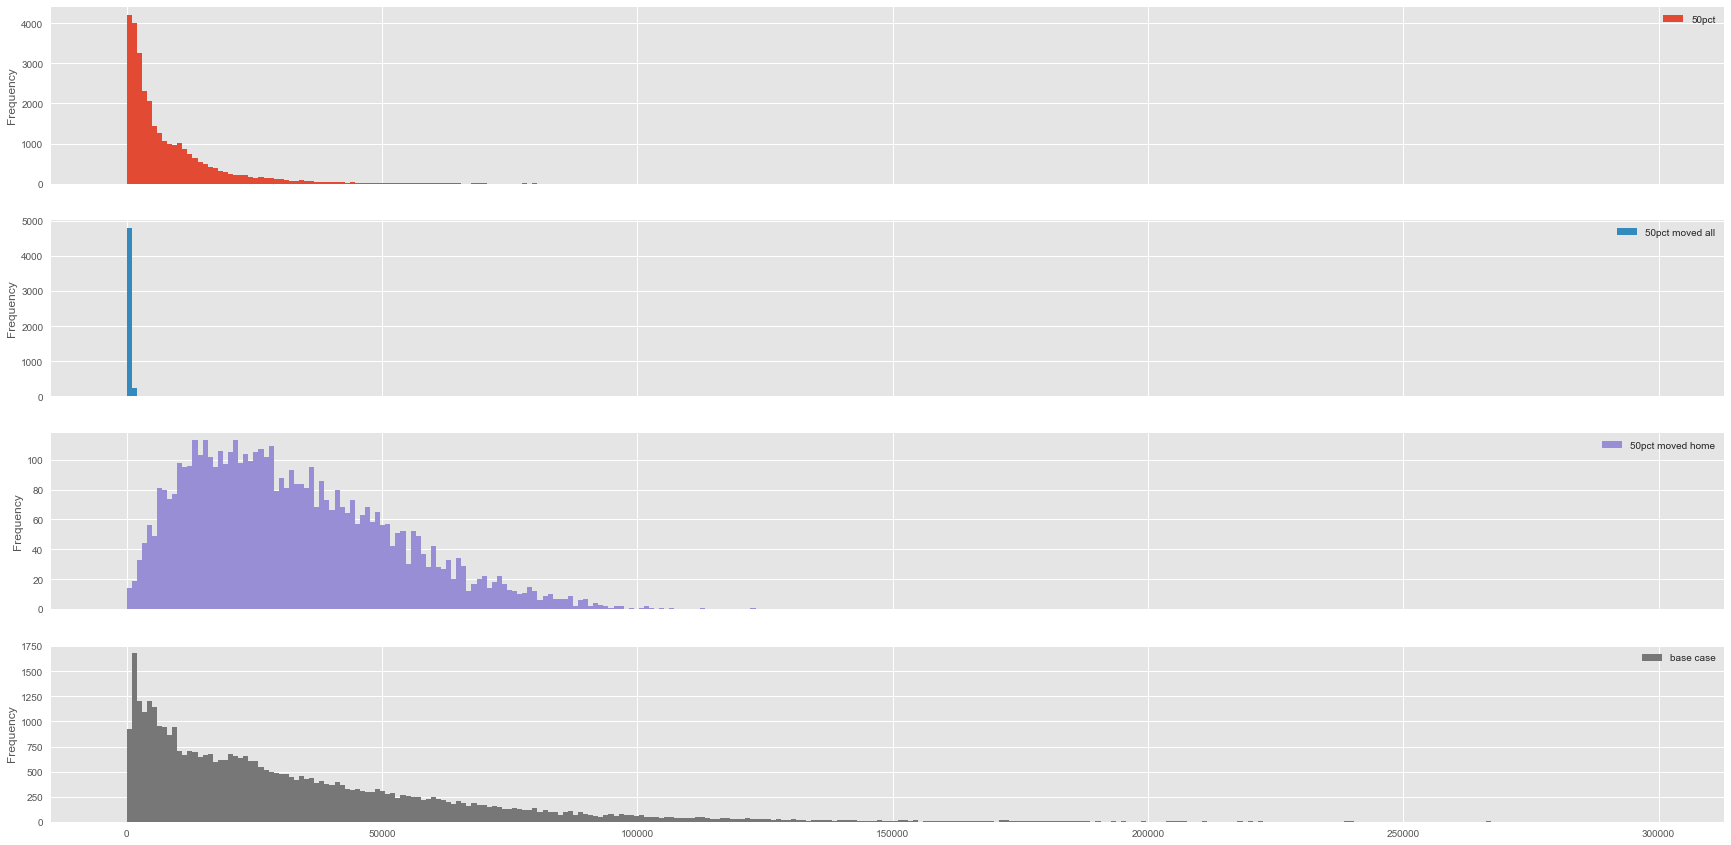

In [208]:
# plot histogram of distances
policy.groupby(['person', 'runId']).sum().query('euclidean_distance < 300000')['euclidean_distance']\
    .unstack().plot.hist(figsize=(30,15), bins=300, subplots=True)

<AxesSubplot:xlabel='longest_distance_mode', ylabel='euclidean_distance'>

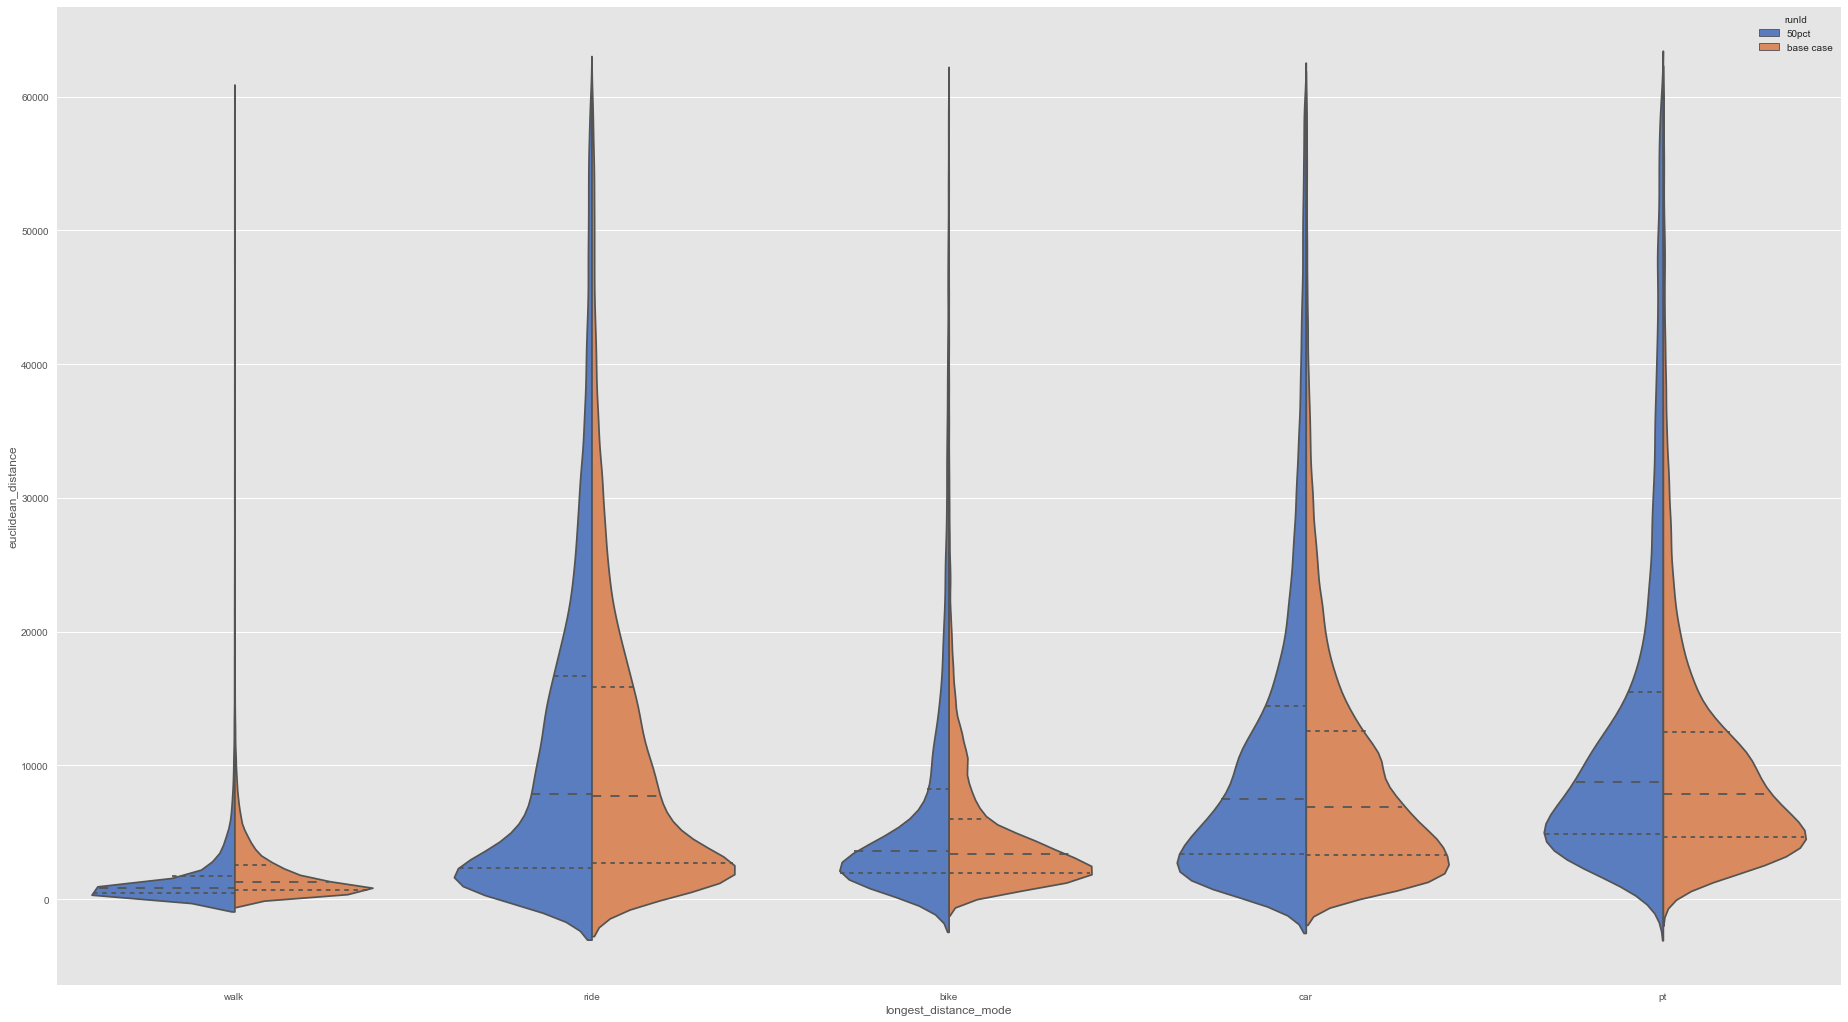

In [209]:
# compare 50% and base case



plt.figure(figsize=(32,18))

comparison = all_policy.append(base_case).query('euclidean_distance < 60000')
sns.violinplot(x="longest_distance_mode", y="euclidean_distance", hue="runId",
               data=comparison, palette="muted", split=True, inner="quartile")





